<div style="text-align: right;">© 2025 Moses Boudourides. All Rights Reserved.</div>

## *instats* Workshop, March 9-12, 2025 
### https://instats.org/seminar/hypernetworks-in-theory-and-practice

# KEY METHODS OF HYPERGRAPH ANALYSIS
## Moses Boudourides

# III. CLIQUE REPRESENTATION OF HYPERGRAPHS

<span style="color:green">
    
### [1. Clique-Based Hypergraph Representation of Graphs](#1)

### [2. Dominating Ego-Clique-Based Hypergraph Representation of Ego-Centered Graphs](#2)
         
</span>

In [1]:
import pandas as pd
import numpy as np
import random
import string
import json
import pickle
import itertools
from itertools import chain
from collections import Counter, defaultdict
lowercase_letters = list(string.ascii_lowercase)
uppercase_letters = list(string.ascii_uppercase)
import hypernetx as hnx
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
all_colors = list(mcolors.CSS4_COLORS.keys())
cmap_list = ['tab20', 'tab10', 'Set1', 'Set2', 'Set3', 'Paired', 'Accent']
distinct_colors = [color for cmap in cmap_list for color in plt.get_cmap(cmap).colors] #[:50]
import pyvis
from pyvis.network import Network
from IPython.display import display, HTML, IFrame
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="hypernetx")

In [2]:
def find_maximal_cliques(G):
    """
    Find all maximal cliques in the graph G using networkx's find_cliques function.
    
    Parameters:
    - G: A networkx graph
    
    Returns:
    - A list of sets, where each set contains the vertices of a maximal clique.
    """
    lists = nx.find_cliques(G)
    lists = [sorted(x) for x in lists]
    return sorted(list(lists), key=len, reverse=True)

def hgp_pyvis(d, name1, name2, vertex_size, hyperedge_size, vertex_color, hyperedge_colors, roundness, output_file="hypergraph.html"):
    """
    Visualizes a hypergraph using PyVis with labels on all nodes.

    Parameters:
    - d (dict): Hypergraph data, either with or without vertex weights.
                Example with weights: {'Group_A': {'Bob': 5, 'Jessy': 4}}
                Example without weights: {'Group_A': {'Bob', 'Jessy'}}
    - name1 (str): Label prefix for hyperedges (dictionary keys).
    - name2 (str): Label prefix for vertices (elements in dictionary values).
    - vertex_size (int): Size of vertices.
    - hyperedge_size (int): Size of hyperedges.
    - vertex_color (str): Color of vertices.
    - hyperedge_colors (list): Colors for hyperedges.
    - roundness (float): Curvature of edges.
    - output_file (str): Output HTML file (default: "hypergraph.html").
    """
    net = Network(notebook=True, height="800px", width="100%", bgcolor="#ffffff", font_color="black", cdn_resources="remote")
    G = nx.Graph()
    first_group_members = next(iter(d.values()))
    has_weights = isinstance(first_group_members, dict)
    for group, members in d.items():
        if has_weights:
            for member, weight in members.items():
                G.add_edge(group, member, weight=weight)  
        else:
            for member in members:
                G.add_edge(group, member, weight=1)  
    group_colors = {group: hyperedge_colors[idx % len(hyperedge_colors)] for idx, group in enumerate(d.keys())}
    for node in d.keys():
        net.add_node(node, size=hyperedge_size, color=group_colors[node], 
                     title=f"{name1}: {node}", label=str(node), font={"size": 20})
    all_vertices = set(G.nodes()) - set(d.keys())
    for node in all_vertices:
        net.add_node(node, size=vertex_size, color=vertex_color, 
                     title=f"{name2}: {node}", label=str(node), font={"size": 15})
    for source, target, data in G.edges(data=True):
        edge_color = group_colors[source] if source in d else group_colors[target]
        net.add_edge(source, target, 
                     width=data['weight'] if has_weights else 1, 
                     color=edge_color,
                     label=str(data['weight']) if has_weights else "",  
                     label_size=20,
                     label_align='center',
                     label_x_offset=0,
                     label_y_offset=0,
                     title=f"Weight: {data['weight']}" if has_weights else "",  
                     smooth={"type": "curvedCCW", "roundness": roundness})  
    net.toggle_physics(True)
    net.save_graph(output_file)

    return IFrame(src=output_file, width="100%", height="800px")

<a id='1'></a>
## <span style="color:green">1. Clique-Based Hypergraph Representation of Graphs</span>

{'clique_0': [0, 1, 2, 3, 13], 'clique_1': [0, 1, 2, 3, 7], 'clique_2': [8, 30, 32, 33], 'clique_3': [23, 29, 32, 33], 'clique_4': [0, 1, 17], 'clique_5': [0, 1, 19], 'clique_6': [0, 1, 21], 'clique_7': [0, 4, 10], 'clique_8': [0, 4, 6], 'clique_9': [0, 5, 10], 'clique_10': [0, 5, 6], 'clique_11': [0, 2, 8], 'clique_12': [0, 3, 12], 'clique_13': [2, 8, 32], 'clique_14': [5, 6, 16], 'clique_15': [14, 32, 33], 'clique_16': [15, 32, 33], 'clique_17': [18, 32, 33], 'clique_18': [20, 32, 33], 'clique_19': [22, 32, 33], 'clique_20': [31, 32, 33], 'clique_21': [26, 29, 33], 'clique_22': [23, 27, 33], 'clique_23': [28, 31, 33], 'clique_24': [24, 25, 31], 'clique_25': [0, 11], 'clique_26': [0, 31], 'clique_27': [1, 30], 'clique_28': [2, 9], 'clique_29': [2, 27], 'clique_30': [2, 28], 'clique_31': [9, 33], 'clique_32': [13, 33], 'clique_33': [19, 33], 'clique_34': [24, 27], 'clique_35': [23, 25]}


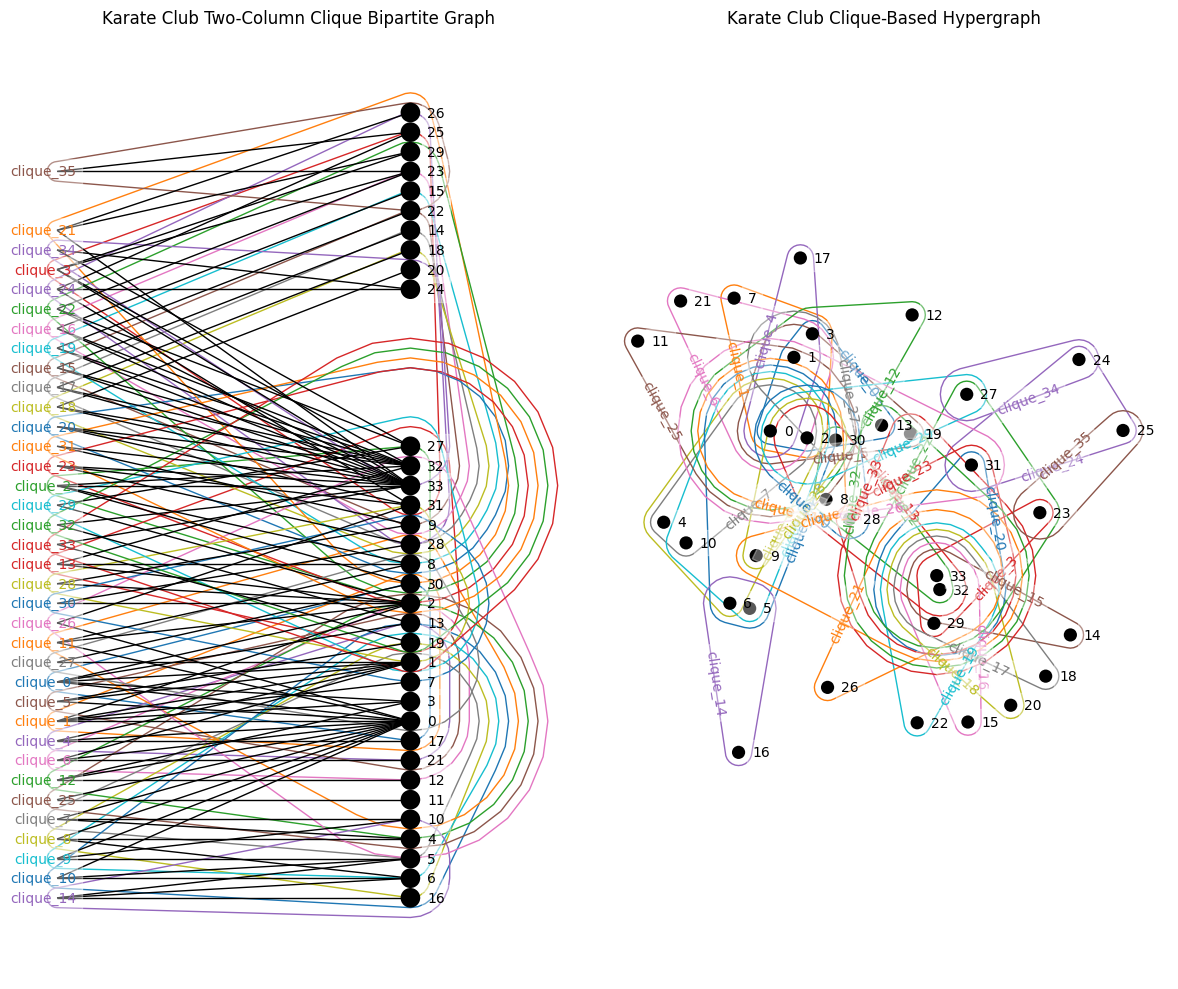

In [3]:
G = nx.karate_club_graph()
cliques = find_maximal_cliques(G)

hg_d = {f"clique_{i}": clique for i, clique in enumerate(cliques)}
print(hg_d)
dual_hg_d = {v: [k for k in hg_d if v in hg_d[k]] for v in set().union(*hg_d.values())}

H_hnx = hnx.Hypergraph(hg_d)

fig, axes = plt.subplots(1, 2, figsize=(12, 10))

hnx.draw_bipartite_using_euler(H_hnx, ax=axes[0])
axes[0].set_title("Karate Club Two-Column Clique Bipartite Graph")

hnx.draw(H_hnx, ax=axes[1])
axes[1].set_title("Karate Club Clique-Based Hypergraph")

plt.tight_layout()
plt.show()

In [4]:
d=hg_d
name1='Hyperedge'
name2='Vertices'
vertex_size=10 
hyperedge_size=3
vertex_color="yellow"
# cmap = plt.get_cmap("tab20")  
# hyperedge_colors = [cmap(i) for i in np.linspace(0, 1, 50)]
# hyperedge_colors = [c for c in hyperedge_colors if c!=vertex_color]
# hyperedge_colors=distinct_colors[:len(d)]
# [c for c in random.sample(distinct_colors,len(d)) if c!=vertex_color]
hyperedge_colors =[c for c in random.sample(all_colors,len(d)) if c!=vertex_color]
# hyperedge_colors = ["cyan", "lime", "lightcoral", "violet"]
roundness=1
output_file="Karate_clique_bipartite_hypergraph.html"
hgp_pyvis(d, name1, name2, vertex_size, hyperedge_size, vertex_color, hyperedge_colors, roundness, output_file)

{'clique_0': ['Bahorel', 'Bossuet', 'Combeferre', 'Courfeyrac', 'Enjolras', 'Feuilly', 'Gavroche', 'Joly', 'Mabeuf', 'Marius'], 'clique_1': ['Bahorel', 'Bossuet', 'Combeferre', 'Courfeyrac', 'Enjolras', 'Feuilly', 'Gavroche', 'Grantaire', 'Joly', 'Prouvaire'], 'clique_2': ['Blacheville', 'Dahlia', 'Fameuil', 'Fantine', 'Favourite', 'Listolier', 'Tholomyes', 'Zephine'], 'clique_3': ['Bahorel', 'Bossuet', 'Courfeyrac', 'Enjolras', 'Gavroche', 'Grantaire', 'Joly', 'MmeHucheloup'], 'clique_4': ['Babet', 'Gavroche', 'Gueulemer', 'Javert', 'Montparnasse', 'Thenardier', 'Valjean'], 'clique_5': ['Babet', 'Claquesous', 'Gueulemer', 'Javert', 'Montparnasse', 'Thenardier', 'Valjean'], 'clique_6': ['Babet', 'Claquesous', 'Gueulemer', 'Javert', 'MmeThenardier', 'Thenardier', 'Valjean'], 'clique_7': ['Bamatabois', 'Brevet', 'Champmathieu', 'Chenildieu', 'Cochepaille', 'Judge', 'Valjean'], 'clique_8': ['Babet', 'Brujon', 'Claquesous', 'Eponine', 'Gueulemer', 'Montparnasse', 'Thenardier'], 'clique_9':

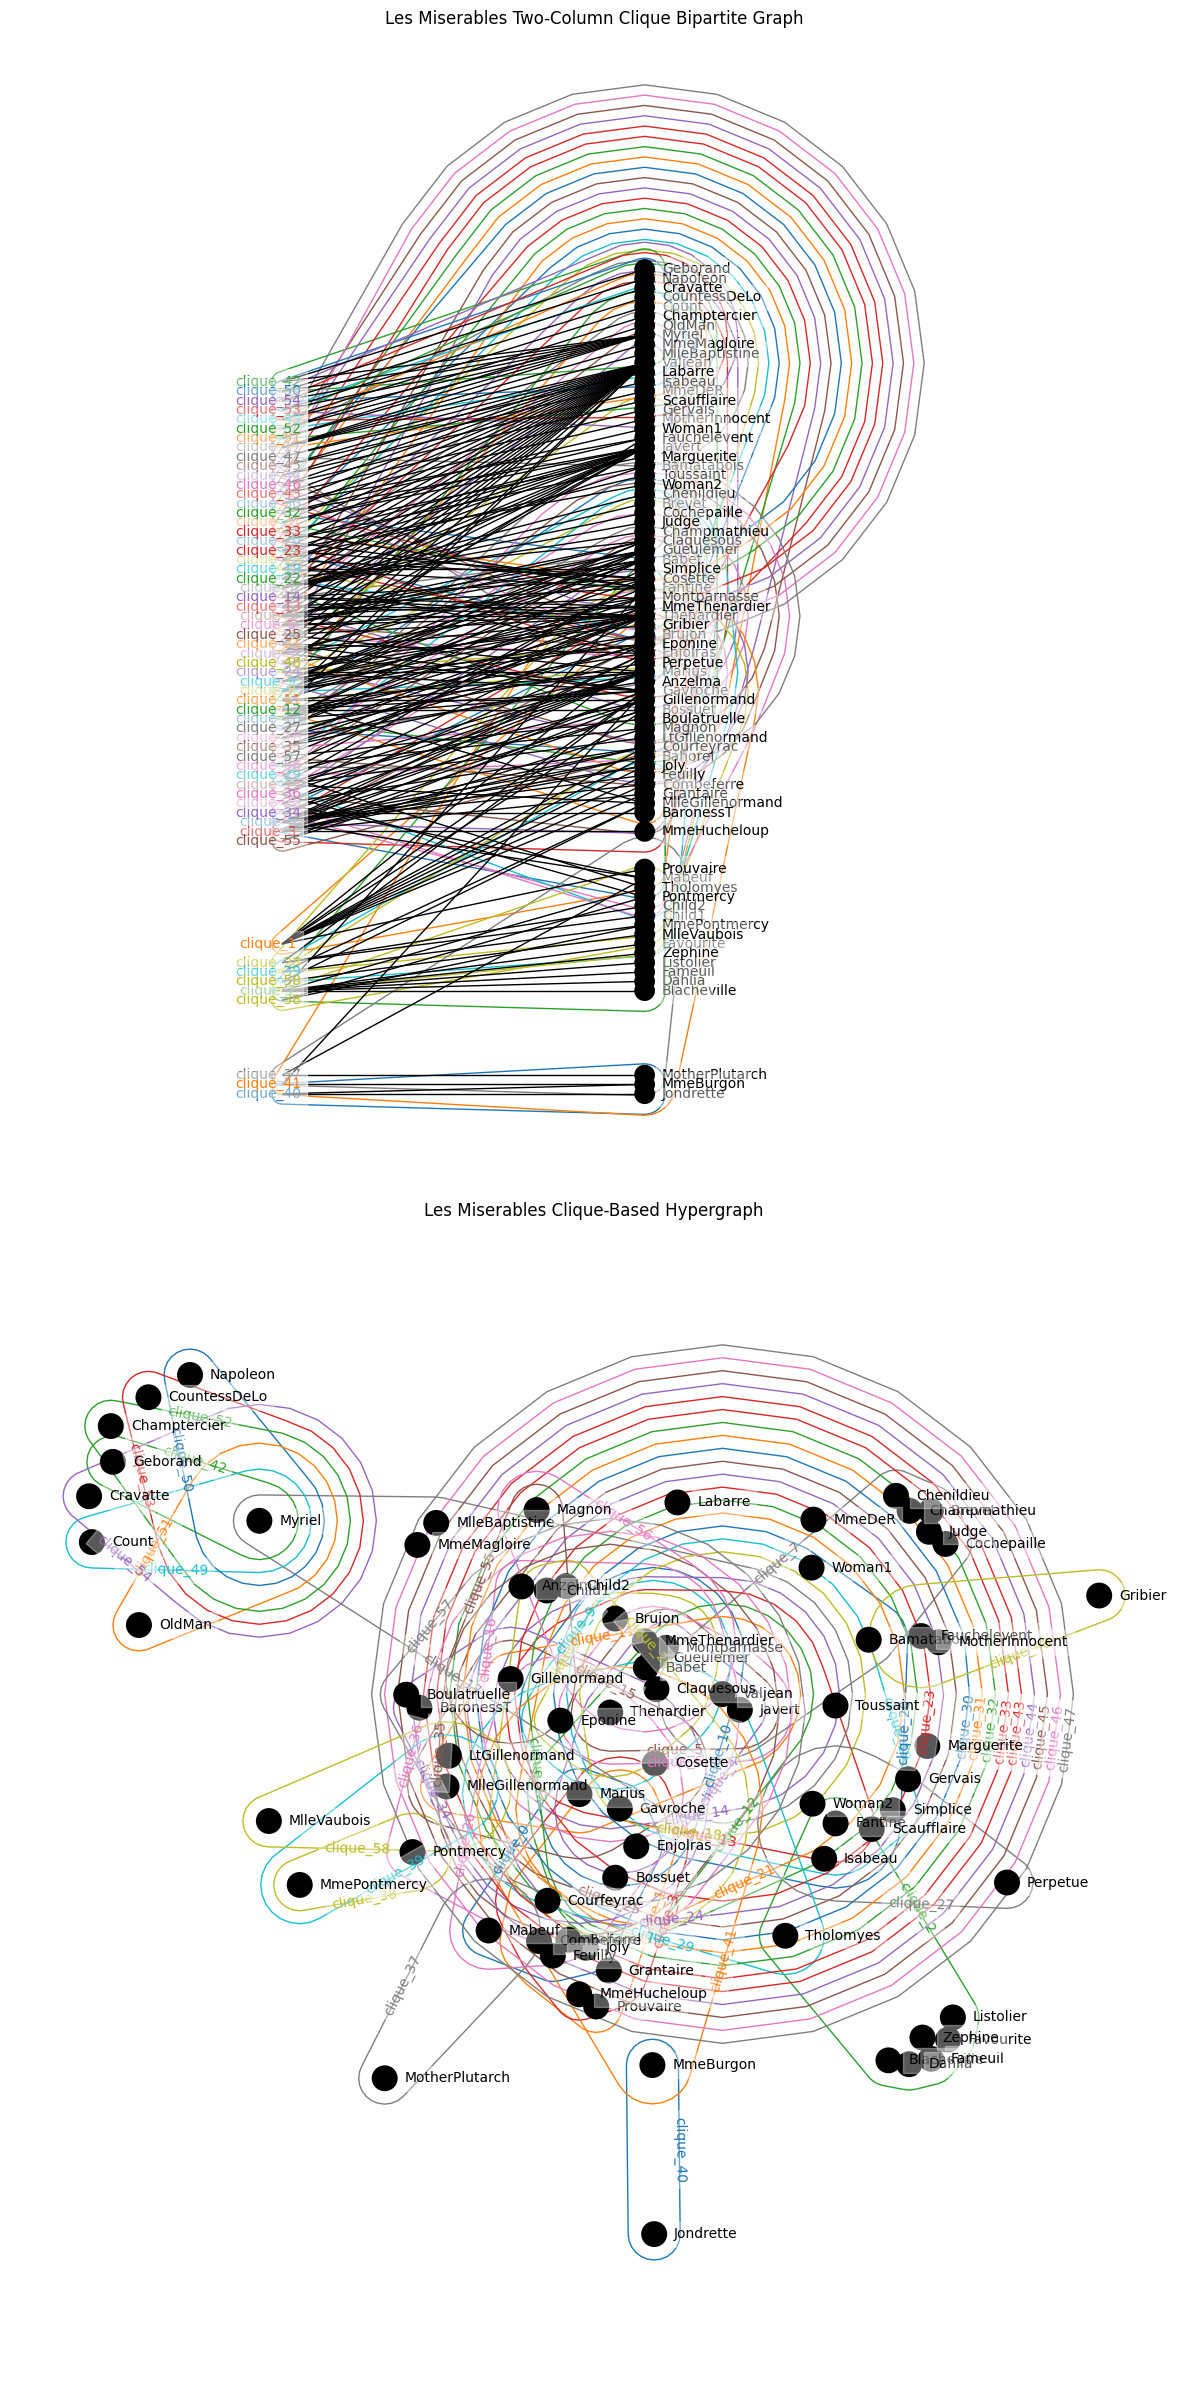

In [5]:
G = nx.les_miserables_graph()
cliques = find_maximal_cliques(G)

hg_d = {f"clique_{i}": clique for i, clique in enumerate(cliques)}
print(hg_d)
dual_hg_d = {v: [k for k in hg_d if v in hg_d[k]] for v in set().union(*hg_d.values())}

H_hnx = hnx.Hypergraph(hg_d)

fig, axes = plt.subplots(2, 1, figsize=(12, 24))
fig.subplots_adjust(hspace=0, wspace=-0.5)
# fig = plt.figure(figsize=(12, 15))
# gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 
# ax1 = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1])

hnx.draw_bipartite_using_euler(H_hnx, ax=axes[0]) # ax1)
axes[0].set_title("Les Miserables Two-Column Clique Bipartite Graph") # ax1

hnx.draw(H_hnx, ax=axes[1]) # ax2)
axes[1].set_title("Les Miserables Clique-Based Hypergraph") # ax2

plt.tight_layout()
plt.show()

In [6]:
d=hg_d
name1='Hyperedge'
name2='Vertices'
vertex_size=10 
hyperedge_size=3
vertex_color="yellow"
# cmap = plt.get_cmap("tab20")  
# hyperedge_colors = [cmap(i) for i in np.linspace(0, 1, 50)]
# hyperedge_colors = [c for c in hyperedge_colors if c!=vertex_color]
# hyperedge_colors=distinct_colors[:len(d)]
# [c for c in random.sample(distinct_colors,len(d)) if c!=vertex_color]
hyperedge_colors =[c for c in random.sample(all_colors,len(d)) if c!=vertex_color]
# hyperedge_colors = ["cyan", "lime", "lightcoral", "violet"]
roundness=1
output_file="LesMiserables_clique_bipartite_hypergraph.html"
hgp_pyvis(d, name1, name2, vertex_size, hyperedge_size, vertex_color, hyperedge_colors, roundness, output_file)

<a id='2'></a>
## <span style="color:green">2. Dominating Ego-Clique-Based Hypergraph Representation of Ego-Centered Graphs</span>

In [7]:
filepath = "hypergraph_bipartite1e_LivingLab_Wave1a.html"
display(IFrame(src=filepath, width=1000, height=1000))

In [8]:
filepath = "hypergraph_bipartite1e_LivingLab_Wave2a.html"
display(IFrame(src=filepath, width=1000, height=1000))